In [15]:
import numpy as np
from model import ConnectFour, Agent
from display import *
from matplotlib import pyplot as plt
import math

# Environment

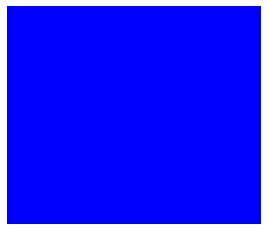

<Figure size 432x288 with 0 Axes>

In [2]:
cf = ConnectFour()
cf.init_state()
cf.display()

In [8]:
cf.step(3)

(0, False)

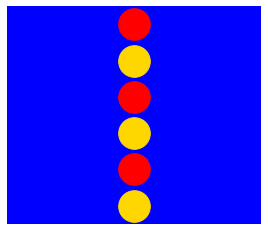

<Figure size 432x288 with 0 Axes>

In [9]:
cf.display()

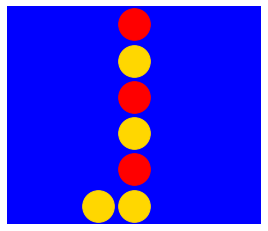

<Figure size 432x288 with 0 Axes>

In [10]:
cf.step()
cf.display()

In [11]:
cf.state

(-1, array([[ 0,  0,  0, -1,  0,  0,  0],
        [ 0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0],
        [ 0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0],
        [ 0,  0,  1,  1,  0,  0,  0]]))

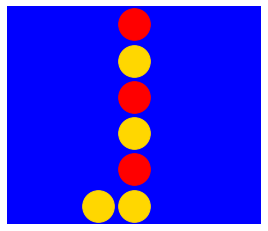

<Figure size 432x288 with 0 Axes>

In [12]:
cf.display()

# Training an agent
We want to train an agent, that is a function that takes the current state of the game and computes the next move. This agent must learn by trial and error, so by playing games against some default adversary and then receive rewards or penalties as they win or lose the games. We will implement UCT, the tree exploration algorithm seen in class and based on optimism.


## Tree structures in Python
Python does not have a built in tree data structure but you can easily find one on the internet though it is easy enough to code your own

In [13]:
class Node:
    def __init__(self,state=None, parent=None, is_root=False):
        self.state = state # store the couple (player, board) 
        self.children = {}
        self.parent = parent
        self.nb_games = 0
        self.nb_wins = 0
        self.is_root = is_root
        
    def add_child(self, child, action):
        """
        add a child in the form of a dictionary entry indexed by the action that leads to it
        child: Node object
        action: integer
        """
        self.children[action] = child
        child.set_parent(self)      
        
        
    def set_parent(self, parent):
        """
        parent is a Node object that has self as a child
        """
        self.parent = parent
        
    def set_value(self,val):
        self.value = val
        
    def set_state(self, state):
        self.state = state

## The MCTS agent: growing a tree
an MCTS agent 

In [23]:

class MCTS(Agent):
    
    def __init__(self, environment=ConnectFour):
        self.game = environment()
        self.game.init_state()
        self.root = Node(is_root=True, state=self.game.state) # a tree node with no parent
        self.current_node = self.root #initialize at the root
        self.nb_games = 0
        
    def reset(self):
        self.current_node = self.root
        
    def train(self, nb_rounds=10, printing=False):
        for n in range(nb_rounds):
            # start a game
            self.game.init_state()
            
            self.current_node = self.root
            final = False
            if printing:
                    print('entering game number '+str(n))
            while not final:
                
                available_actions = self.game.get_actions(self.current_node.state)
                known_actions = self.current_node.children.keys()
                unknown_actions = list(set(available_actions) - set(known_actions))

                # known tree area: 
                if unknown_actions == []:
                    if printing:
                        print('node fully expanded: choose next with UCT')
                    #compute next move according to the MCTS algorithm with UCT
                    action = self.next_move()
                    self.current_node = self.current_node.children[action]

                    reward, final = self.game.step(action)
                    
                    
                # unknown tree area: need to expand the tree
                else:
                    if printing:
                        print('node not fully expanded: explore and expand')
                    # find an action that has not been explored
                    action = unknown_actions[0]
                            
                    
                    child= self.expand(self.current_node, action) # play default policy until the end to get a reward
                    self.current_node = child
                    
                    # simulate the end of the game with random plays
                    reward = self.simulate()
                    
                    if printing:
                        print('node expanded')
                    
                    final = True
                    
            # game is over, reward is collected, now we backpropagate it on the path
                    
            self.backpropagate(self.current_node, reward) # backprop the rewards up in the tree
            if printing:
                print('reward backpropagated from child')
                self.game.display()

            self.nb_games +=1

                    
            
            
            
        
    def next_move(self):
        """
        returns the next move (integer action) given a board state (Node object)
        """
        values = dict()
        ## TODO:  implement UCT decision with C_p = 1.
        for action, child in self.current_node.children.items():
            values[action] = np.random.random
            
            
        chosen_action = max(values, key=(lambda k: values[k]))
        return chosen_action

            
    def backpropagate(self, expanded_node, reward):
        """ propagates back the value received by the expanded node following rollout"""
        
        current_node = expanded_node
        
        while not current_node.is_root: 
            
#             self.game.display(states=current_node.state)
               
            current_node.nb_wins += reward
            
            current_node.nb_games += 1
            current_node = current_node.parent
            reward *= -1 # propagate opposite values along the path for each player
            
            
            
    def expand(self, current_node, move):
        """
        move into chosen child state (node created created)
        """
        # add a node ...
        child = Node(parent=current_node)
        child.nb_games = 1 # it is being played
        current_node.add_child(child, move)
        _, state = self.game.get_transition(current_node.state, move)
        child.set_state(list(state[0]))
        

        return child
    

    def simulate(self):
        final = False
        while not final:
            reward, final = self.game.step()
            
        return reward
    
    def play(self):
        available_actions = self.game.get_actions(self.game.state)
        known_actions = self.current_node.children.keys()
        unknown_actions = list(set(available_actions) - set(known_actions))

        # known tree area: 
        if unknown_actions == []:
            
            #compute next move according to the MCTS algorithm with UCT
            action = self.next_move()


        # unknown tree area: need to expand the tree
        else:
            # find an action that has not been explored
            
            action = np.random.choice(unknown_actions)

            
        return action
            
        
        
        
    
        
        
        

In [24]:
ai = MCTS()


In [26]:
ai.train(printing=False, nb_rounds=10000)

ai move : 4


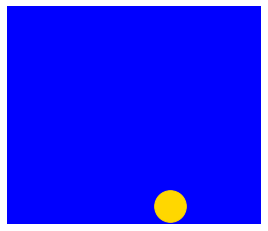

3


<Figure size 432x288 with 0 Axes>

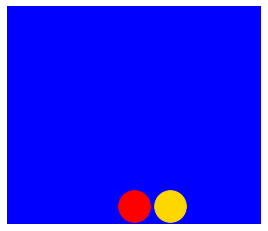

ai move : 2


<Figure size 432x288 with 0 Axes>

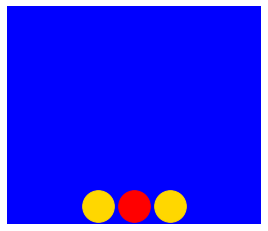

3


<Figure size 432x288 with 0 Axes>

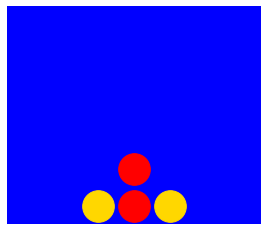

ai move : 4


<Figure size 432x288 with 0 Axes>

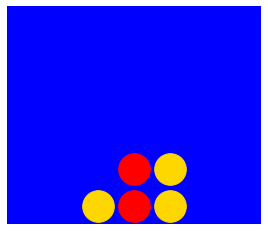

4


<Figure size 432x288 with 0 Axes>

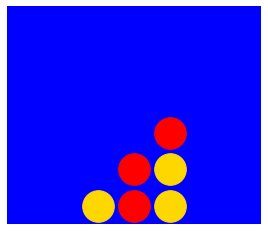

ai move : 5


<Figure size 432x288 with 0 Axes>

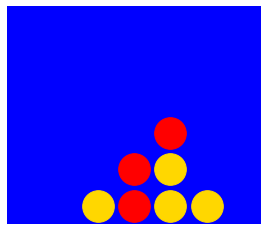

3


<Figure size 432x288 with 0 Axes>

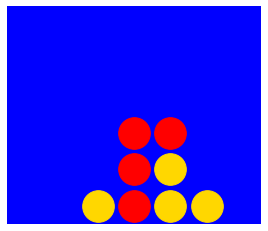

ai move : 3


<Figure size 432x288 with 0 Axes>

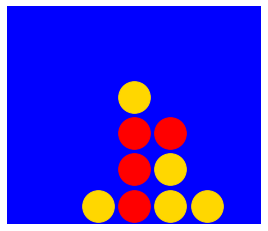

2


<Figure size 432x288 with 0 Axes>

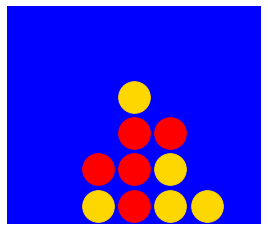

ai move : 0


<Figure size 432x288 with 0 Axes>

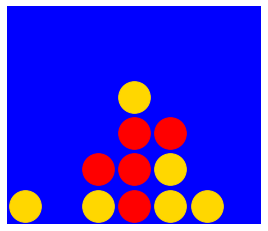

1


<Figure size 432x288 with 0 Axes>

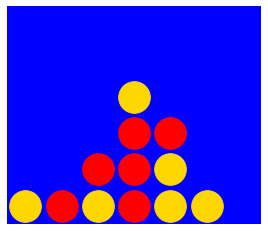

ai move : 1


<Figure size 432x288 with 0 Axes>

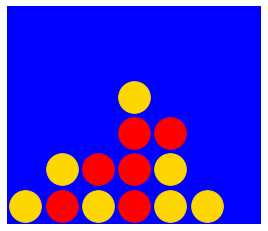

4


<Figure size 432x288 with 0 Axes>

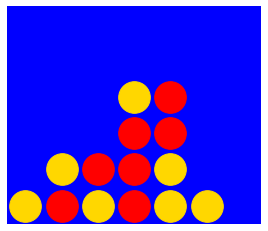

You won !


<Figure size 432x288 with 0 Axes>

In [28]:
final = False
ai.game.init_state()
ai.reset()

while not final:
    player, _ = ai.game.state
    
    if player == -1:
        #your turn
        move = int(input())
        
    if player == 1:
        move = ai.play()
        print('ai move : '+str(move))
        
    reward, final = ai.game.step(action=move)
    if move in ai.current_node.children.keys():
        ai.current_node = ai.current_node.children[move]
    else:
        child = ai.expand(ai.current_node, move)
        ai.current_node = child
    ai.game.display()
    
if reward < 0:
    print('You won !')
else:
    print('The AI beat you...')

# Questions

* Implement UCT in the next_move function such that the tree search algorithm of the AI is not purely random.
* The UCT algorithm relies on a default policy that simulates values for the nodes to be expanded. Can you think of a way to improve this default policy to make the tree search even more efficient ? 
* Print out the values of the UCBs for the first 7 actions at the root. Did the AI learn a pattern ? Is it reliable ? 
* Print out more UCB values for the second move in the tree after different number of training rounds. Can you observe that the AI learns some techniques ?
* Look for the sequence (Y:0, R:6, Y:1, R:6, Y:0, R:6) in the tree. Has it been explored already ? If not, run more training rounds to give a chance to the AI to explore it. When it has been explored, can you check that the best response for Yellow at next round is to play 6 in order to block the immediate win of Red ? Searching for immediate win at next round is a classical deterministic technique to improve tree search algorithms, it good, for instance, improve the default policy. 